# Linear regression three ways

This notebook seeks to implement linear regression in three ways: <br>
- sci-kit learn implementation <br>
- normal equation implementation - using numpy arrays<br>
- gradient descent implementation - using numpy arrays <br>
<br>
It uses the whole of the boston house-price dataset.

The setup for linear regression is:
<br>
<br>
$Hypothesis: h(x) = \sum_{j=1}^{n}\theta_jx_j$
<br>
<br>
$Cost: J(\theta) = \frac{1}{2m}\sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$

# Import libaries

Load the libaries needed for multiple regression

In [1]:
import numpy as np
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Setup chart/ print settings

In [2]:
# plot charts automatically
%matplotlib inline
# define plot styles
sns.set(font_scale=2)
sns.set_style("darkgrid")

Set print formats so that numpy arrays do not print in scientific format

In [3]:
# Set print conditions
np.set_printoptions(suppress=True, precision=2) 

# Import datasets

Load and return the boston house-prices dataset (regression).

In [4]:
# import boston dataset from sklearn and create X features and y vector
boston = datasets.load_boston()
y = boston.target
X = boston.data

Scale data as this is needed for regularization and gradient descent

In [5]:
# Initiate the standard scaler: scaler
scaler = StandardScaler()
# Scale data as feature scaling makes gradient descent/ regularization converge more quickly or converge at all
X = scaler.fit_transform(X)

Check format of data

In [6]:
# check shape of the data
print(y.shape,X.shape)

(506,) (506, 13)


# Regression

### Sci-kit learn baseline

In [7]:
# Create the regressor: lr
lr = linear_model.LinearRegression()

In [8]:
# Fit the model to the data: model
model = lr.fit(X, y)

In [9]:
# Compute predictions for the features: y_pred
y_pred = model.predict(X)

In [10]:
# print intercept:
print("Intercept: ",model.intercept_)

Intercept:  22.5328063241


In [11]:
# print coefficients:
print("Coefficients: ",model.coef_)

Coefficients:  [-0.92  1.08  0.14  0.68 -2.06  2.67  0.02 -3.1   2.66 -2.08 -2.06  0.86
 -3.75]


In [12]:
# Print the mean squared error:
print("Mean squared error: ",mean_squared_error(y,y_pred))

Mean squared error:  21.8977792177


### Normal equation

Next an implemention of linear regression via the closed-form solution (analytical solution) below.
<br>
<br>
$
\begin{align}
\theta = (X^TX)^{-1}X^Ty
\end{align}
$
<br>
<br>

In [13]:
# Add column of 1s to feature matrix, which is needed for the matrix implementation of the normal equation and gradient descent
X = np.hstack((np.ones((X.shape[0], 1)),X))

In [14]:
# Transpose the feature vector X: X_trans
X_trans=np.transpose(X)

In [15]:
# Calculate theta using the normal equation: theta
theta = np.dot(np.dot(np.linalg.inv(np.dot(X_trans,X)),X_trans),y)

In [16]:
# Compute predictions for the features
y_pred2 = np.dot(X,theta)

In [17]:
# print intercept
print("Intercept: ",theta[0])

Intercept:  22.5328063241


In [18]:
# print coefficients
print("Coefficients: ",theta[1:])

Coefficients:  [-0.92  1.08  0.14  0.68 -2.06  2.67  0.02 -3.1   2.66 -2.08 -2.06  0.86
 -3.75]


In [19]:
# calculate and print the mean squared error
print("Mean squared error: ",np.mean(np.square(y_pred2-y)))

Mean squared error:  21.8977792177


### Batch gradient descent

In [20]:
# define cost function that computes the mean-squared error for given theta
def cost(X,theta,y):
    cost = np.mean(np.square((np.dot(X,theta))-y))
    return cost

In [21]:
# define gradient function that computes the gradient for a given theta
def gradient(X,theta,y,m):
    gradient = np.dot(np.transpose(X),(np.dot(X,theta)-y))/m
    return gradient

In [22]:
# define gradient descent function, which returns the cost and the final theta estimates for linear regression
def gradient_descent(X,y,n_iter,alpha):
    
    # initilize theta vector to zeros
    theta = np.zeros(X.shape[1])
    
    # initilize  costs vector to store results
    costs = np.zeros(n_iter)
    
    # initilize  m=the number of training examples
    m=y.shape[0]
    
    # perform batch gradient descent a maximum of n_iter times
    for i in range(n_iter):
        #Save old theta
        theta_old = theta
        
        # Perform batch update of theta using gradient descent
        theta = theta - alpha*gradient(X,theta,y,m)
        
        # Update costs vector with cost for new theta
        costs[i]=cost(X,theta,y)
        
        # stopping criteria: stop if the norm of the difference in theta is less than 0.000001
        epsilon = np.linalg.norm(theta-theta_old, ord=1)
        if epsilon<0.000001:
            # delete any unused space from vector before stopping
            costs = np.delete(costs, range(i+1, n_iter), None)
            break
            
        # Divergence test: if the costs start increasing by more than 1 stop and print error
        if i>0:
            diff = costs[i-1]-costs[i]
            if(diff<-1):
                raise ValueError('Gradient descent is diverging choose a smaller alpha')
                
        # Print message if didn't converge in number of iterations
        if i+1 == n_iter:
            print('Model did not fully convege try picking a higher number of iterations (n_iter) or learning rate (alpha)')
    
    #return the cost vector and theta
    return costs,theta

In [23]:
# perform gradient descent with alpha=0.3 and iterations=650
cost_grad,theta_grad=gradient_descent(X,y,n_iter=650,alpha=0.3)

In [24]:
# print intercept:
print("Intercept: ",theta_grad[0])

Intercept:  22.5328063241


In [25]:
# print coefficients
print("Coefficients: ",theta_grad[1:])

Coefficients:  [-0.92  1.08  0.14  0.68 -2.06  2.67  0.02 -3.1   2.66 -2.08 -2.06  0.86
 -3.75]


In [26]:
# print the mean squared error:
print("Mean squared error gradient descent: ",cost_grad[-1])

Mean squared error gradient descent:  21.8977792177


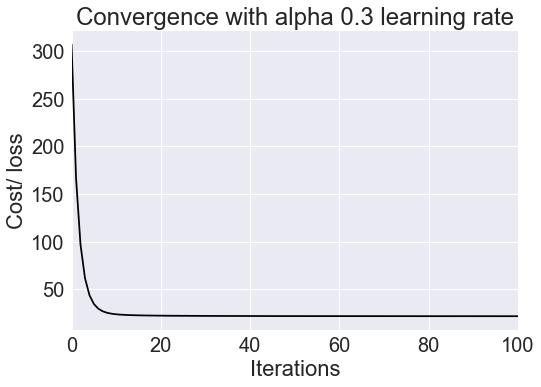

In [27]:
# Plot cost compared to number of iterations
plt.title("Convergence with alpha 0.3 learning rate");
plt.plot(cost_grad,color='black', label="0.3");
plt.ylabel('Cost/ loss');
plt.xlabel('Iterations');
plt.xlim(0,100);

# Compare cost/loss of the methods

In [28]:
print("Mean squared error sci-kit learn: ",mean_squared_error(y,y_pred))
print("Mean squared error normal equation: ",np.mean(np.square(y_pred2-y)))
print("Mean squared error gradient descent: ",cost_grad[-1])

Mean squared error sci-kit learn:  21.8977792177
Mean squared error normal equation:  21.8977792177
Mean squared error gradient descent:  21.8977792177
